In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']

df=pd.read_csv('balance-scale(1).csv',header=None,names=col_names)

In [3]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df.tail()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4
624,B,5,5,5,5


In [5]:
df.shape

(625, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class Name        625 non-null object
Left-Weight       625 non-null int64
Left-Distance     625 non-null int64
Right-Weight      625 non-null int64
Right-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [7]:
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [8]:
df.isnull().sum()

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

In [9]:
#as we can see there are no null values:

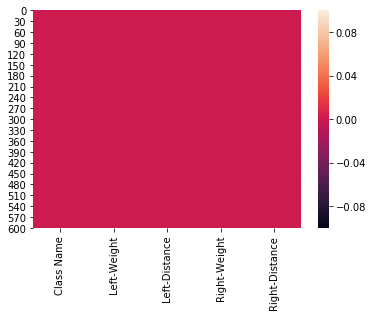

In [10]:
sns.heatmap(df.isnull())

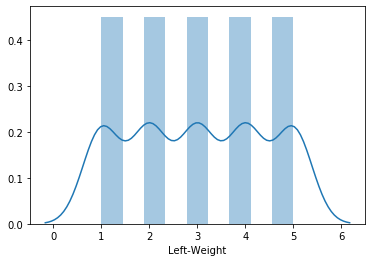

In [11]:
sns.distplot(df['Left-Weight'])

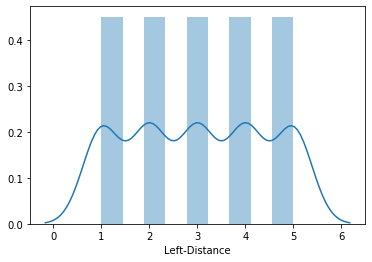

In [12]:
sns.distplot(df['Left-Distance'])

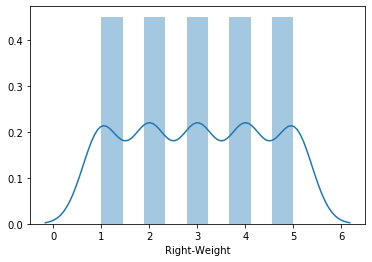

In [13]:
sns.distplot(df['Right-Weight'])

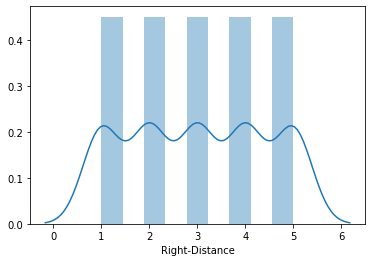

In [14]:
sns.distplot(df['Right-Distance'])

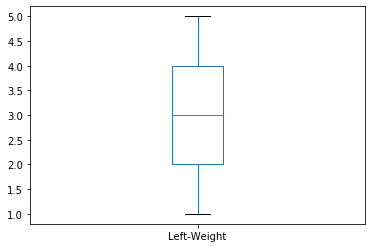

In [15]:
df['Left-Weight'].plot.box()

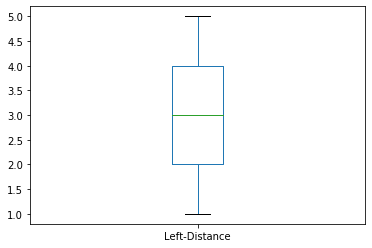

In [16]:
df['Left-Distance'].plot.box()

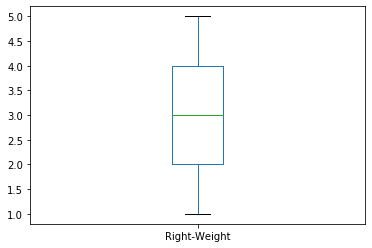

In [17]:
df['Right-Weight'].plot.box()

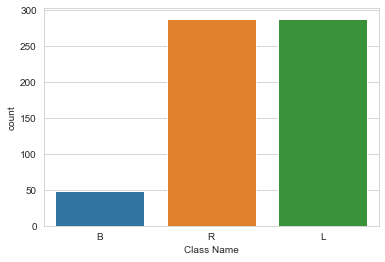

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Class Name',data=df)

In [20]:
#Dividing X and y
y=df[['Class Name']]
x=df.drop(['Class Name'], axis = 1)

In [33]:
from sklearn.preprocessing import LabelEncoder   #to convert categorical data to 0,1 and 2
le=LabelEncoder()
df['Class Name']=le.fit_transform(df['Class Name'])

In [34]:
df

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5
...,...,...,...,...,...
620,1,5,5,5,1
621,1,5,5,5,2
622,1,5,5,5,3
623,1,5,5,5,4


In [35]:
df.dtypes

Class Name        int32
Left-Weight       int64
Left-Distance     int64
Right-Weight      int64
Right-Distance    int64
dtype: object

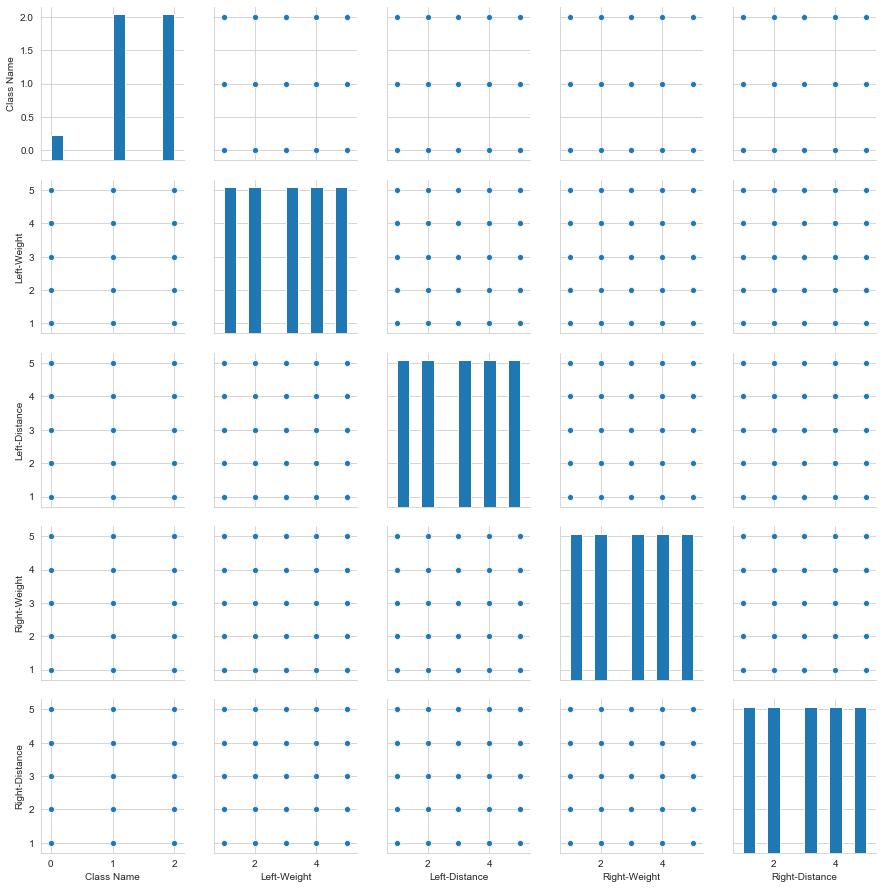

In [36]:
sns.pairplot(df)

In [37]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [38]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.20523001, 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.98520693, 1.41421356, 1.41421356, 1.41421356, 0.70710678],
       [0.98520693, 1.41421356, 1.41421356, 1.41421356, 0.        ],
       ...,
       [0.61001154, 1.41421356, 1.41421356, 1.41421356, 0.        ],
       [0.61001154, 1.41421356, 1.41421356, 1.41421356, 0.70710678],
       [2.20523001, 1.41421356, 1.41421356, 1.41421356, 1.41421356]])

In [39]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


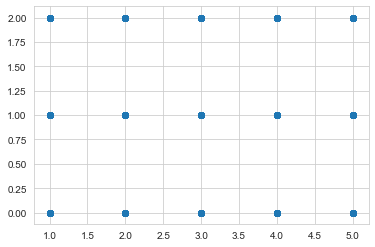

In [40]:
plt.scatter(df['Left-Weight'],df['Class Name'])
plt.show()

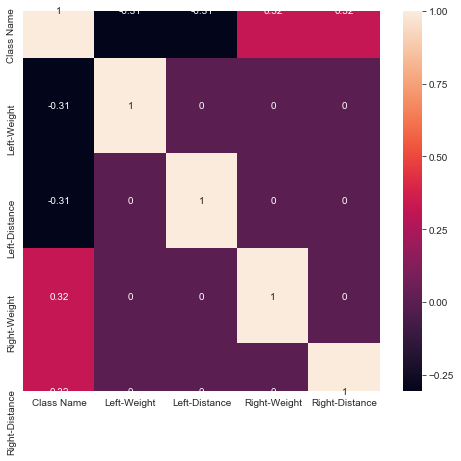

In [41]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [69]:
x_train.shape

(418, 4)

In [70]:
y_train.shape

(418,)

In [71]:
x_test.shape

(207, 4)

In [72]:
y_test.shape

(207,)

In [73]:
lg=LogisticRegression()

In [74]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.8405797101449275
[[ 0  4 15]
 [ 0 91 10]
 [ 0  4 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.92      0.90      0.91       101
           2       0.77      0.95      0.85        87

    accuracy                           0.84       207
   macro avg       0.56      0.62      0.59       207
weighted avg       0.77      0.84      0.80       207



In [76]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8840579710144928
[[ 0  4 15]
 [ 0 96  5]
 [ 0  0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.96      0.95      0.96       101
           2       0.81      1.00      0.90        87

    accuracy                           0.88       207
   macro avg       0.59      0.65      0.62       207
weighted avg       0.81      0.88      0.84       207



In [83]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9130434782608695
[[19  0  0]
 [ 9 91  1]
 [ 8  0 79]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        19
           1       1.00      0.90      0.95       101
           2       0.99      0.91      0.95        87

    accuracy                           0.91       207
   macro avg       0.84      0.94      0.86       207
weighted avg       0.95      0.91      0.92       207



In [84]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.748792270531401
[[ 0  9 10]
 [12 82  7]
 [11  3 73]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.87      0.81      0.84       101
           2       0.81      0.84      0.82        87

    accuracy                           0.75       207
   macro avg       0.56      0.55      0.56       207
weighted avg       0.77      0.75      0.76       207



In [85]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8309178743961353
[[ 0  7 12]
 [ 6 92  3]
 [ 4  3 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.90      0.91      0.91       101
           2       0.84      0.92      0.88        87

    accuracy                           0.83       207
   macro avg       0.58      0.61      0.60       207
weighted avg       0.79      0.83      0.81       207



In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.821256038647343
[[ 0  8 11]
 [ 6 92  3]
 [ 8  1 78]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      0.91      0.91       101
           2       0.85      0.90      0.87        87

    accuracy                           0.82       207
   macro avg       0.59      0.60      0.59       207
weighted avg       0.80      0.82      0.81       207

